# Finding the 2D $Y$-$E_r$ Distributions Given Arvind's Yield Dist

Arvind has calculated 1-dimensional yield distributions for a given recoil energy, $E_r$. For some of the analysis of the NR Fano paper we would like to know the 2-dimensional distribution in the Yield-Recoil plane. I try to begin calculating that below, first for the $E_p$/$E_q$ plane. 

## The $Y$/$E_r$ Plane

Now, I want to compare to Arvind's function, in the Yield dimension. 

In [1]:
import numpy as np

#construct the functions

#constants
V = 4.0
eps = 3.3/1000 #in keV/pair
#sigq = 1.0
#sigp = 1.0
F = 0.0

#Jardin resolutions
import resfuncRead as rfr

#read the files
ptres = rfr.getRFunc('data/jardin_ptres.txt')
qres = rfr.getRFunc('data/jardin_qsummaxres.txt')

#make the resolution functions
fp = rfr.makeRFunc(ptres[1]['sqrt'])
fq = rfr.makeRFunc(qres[1]['lin'],True)

sigp = lambda x: fp(x) #convert from eV
sigq = lambda x: fq(x) #convert from eV

print(sigp((1+(V/(eps*1000)))*100))
print(sigq(100))

#yield
a = 0.16
b = 0.18

ynr = lambda x: a*x**b
y = lambda x: 1



4.99303989675548
1.3062099999999999


In [2]:
#get Arvind's function
from prob_dist import ratio_dist_v2

#remember the signature: def ratio_dist_v2(x, Er, meanN, sdP, sdQ, sdN, V,e)

far = lambda Y,Er: ratio_dist_v2(Y,Er,Er*y(Er)/eps,sigp((1+(V/(eps*1000))*y(Er))*Er), \
                                 sigq(y(Er)*Er),np.sqrt(F*Er*y(Er)/eps),V/1000,eps)


print(far(0.7,10))

0.06386615272184269


In [3]:
#get the distribution in Er, use a simple exponential for now

alpha = 1/100 #that means will be down by a factor of e at 100 keV
alphaer = 1/1000 #the ER band is basically flat

per = lambda Er: alphaer*np.exp(-alphaer*Er)
pnr = lambda Er: alpha*np.exp(-alpha*Er)

In [4]:
#test out the plotting 
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

In [5]:
from scipy.integrate import quad

F=5.0
Eqbar = lambda Er: ynr(Er)*Er
Et = lambda Er: (1+(V/(eps*1000))*ynr(Er))*Er
Eqsig = lambda Er: np.sqrt(sigq(Er*ynr(Er))**2 + F*eps*Eqbar(Er)) 
Epsig = lambda Er: np.sqrt(sigp(Et(Er))**2 + (V/1000)**2*(1/eps)*F*ynr(Er)*Er) 
Etrsig0 = lambda Er: np.sqrt(Epsig(Er)**2 + ((V/(1000*eps))**2*Eqsig(Er)**2))
Etrsig = lambda Er: np.sqrt(sigp(Et(Er))**2 + ((V/(1000*eps))**2*sigq(ynr(Er)*Er)**2))
Ensig = lambda Er: np.sqrt(F*eps*Eqbar(Er))
Ensig = lambda Er: np.sqrt(F*Eqbar(Er)/eps)
#print(Etrsig0(10))
#print(Etrsig(10))
#print(Eqsig(10))
#print(sigq(10*ynr(10)))

Npqn = lambda Er: (1/np.sqrt(2*np.pi*Ensig(Er)**2))*(1/np.sqrt(2*np.pi*sigq(Eqbar(Er))**2)) \
*(1/np.sqrt(2*np.pi*sigp(Et(Er))**2))

print(Npqn(10))
print(Ensig(10))
print(Eqbar(10)/eps)

Y_ErMeas_4D = lambda dQ,Y,Etr,Er: Npqn(Er)*(np.abs(Etr)/eps) \
*np.exp(-(Etr-Er+(V/(1000*eps))*dQ)**2/(2*sigp(Et(Er))**2)) \
*np.exp(-(dQ)**2/(2*sigq(Eqbar(Er))**2)) \
*np.exp(-((ynr(Er)*Er/eps)-(Y*Etr/eps)+(dQ/eps))**2/(2*Ensig(Er)**2))

print(Y_ErMeas_4D(0,0.3,40,40))

Y_ErMeas = lambda Y,Etr,Er: quad(Y_ErMeas_4D,-np.inf,np.inf,args=(Y,Etr,Er,))[0]


#Y_ErMeas = lambda Y,Etr,Er: (1/np.sqrt(2*np.pi*Eqsig(Er)**2)) \
#*np.abs(Etr)*np.exp(-(Y-(Eqbar(Er)/Etr))**2/(2*(Eqsig(Er)/Etr)**2)) \
#  *(1/np.sqrt(2*np.pi*Etrsig(Er)**2))*np.exp(-(Etr-Er)**2/(2*Etrsig(Er)**2))

#print(Eqbar(10))
#print(Eqsig(10))
#print(Epsig(10))
#print(sigq(10))
#print(sigp(10))
#print(Etrsig(10))
print(Y_ErMeas(0.35,40,40))
#print(40*0.3)
#print(Eqbar(40))

0.004997580628902955
60.574246921842814
733.8478780296767
5.278153128406229
0.3706623687821855


In [6]:
#now do NRs

print(ynr(100))

#remember the signature: def ratio_dist_v2(x, Er, meanN, sdP, sdQ, sdN, V,e)
far_nr = lambda Y,Er: ratio_dist_v2(Y,Er,Er*ynr(Er)/eps,sigp(Et(Er)), \
                                 sigq(ynr(Er)*Er),np.sqrt(F*Er*ynr(Er)/eps),V/1000,eps)

far_nr_v = np.vectorize(far_nr)

0.3665388244428437


In [7]:


Y_Er_Arvcompare = lambda Etr,Y,Er: Y_ErMeas(Y,Etr,Er)
Y_Arvcompare = lambda Y,Er: quad(Y_Er_Arvcompare,0,np.inf,args=(Y,Er,))[0]
Y_Arvcompare_v = np.vectorize(Y_Arvcompare)

print(Y_Arvcompare(0.4,11))
#print(quad(Y_Arvcompare,0,4,args=(10,)))
#print(quad(far_nr,0,4,args=(10,)))

0.3010283701633386


0.2605052075092577


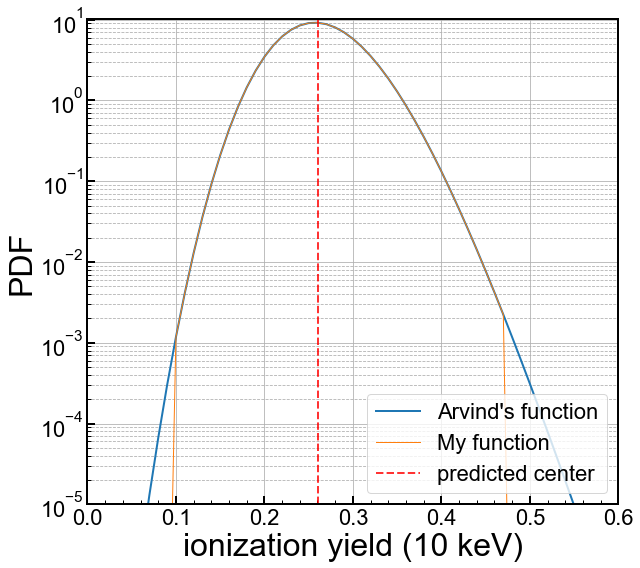

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

Ertest=15
x = np.arange(0,0.6,0.01)
y = far_nr_v(x,Ertest)
ymax = 1.1*np.max(y)
y2 = Y_Arvcompare_v(x,Ertest)

#plot quick
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.plot(x, Y_Er_v(x,Ertest),label='E$_r$ function')
ax1.plot(x, y,lw=2,label='Arvind\'s function')
ax1.plot(x, y2,lw=1, label='My function')
#ax1.contour(X, Y, Z, colors='black',label='E$_r$/N')
#ax1.contour(Xnr, Ynr, Znr, 50,cmap='RdGy');
#plt.contourf(Xnr, Ynr, Znr, 50,cmap='RdGy');

print(ynr(Ertest))
ax1.axvline(ynr(Ertest), color='r', linestyle='--', lw=2, alpha=0.8,label='predicted center')

ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0, 0.6) 
ax1.set_ylim(1e-5,ymax)
ax1.set_xlabel('ionization yield (10 keV)',**axis_font)
ax1.set_ylabel('PDF',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures.png')
#plt.colorbar()
plt.show()

In [9]:
print(y,y2)

[2.37893257e-12 3.52371953e-11 4.40752922e-10 4.68136257e-09
 4.24584591e-08 3.30683762e-07 2.22412160e-06 1.29906123e-05
 6.62572583e-05 2.96720890e-04 1.17304703e-03 4.11561588e-03
 1.28812595e-02 3.61481478e-02 9.14034825e-02 2.09254542e-01
 4.35761125e-01 8.29177156e-01 1.44801117e+00 2.33055131e+00
 3.47120045e+00 4.80333379e+00 6.19857302e+00 7.48698646e+00
 8.49389227e+00 9.08128656e+00 9.17963170e+00 8.79990120e+00
 8.02389006e+00 6.97864083e+00 5.80503985e+00 4.63025802e+00
 3.55007087e+00 2.62251328e+00 1.87075418e+00 1.29139132e+00
 8.64412077e-01 5.62138050e-01 3.55812369e-01 2.19590067e-01
 1.32354349e-01 7.80336774e-02 4.50707126e-02 2.55383380e-02
 1.42155182e-02 7.78324463e-03 4.19675909e-03 2.23112008e-03
 1.17074291e-03 6.06986661e-04 3.11244334e-04 1.57990734e-04
 7.94605085e-05 3.96298028e-05 1.96148589e-05 9.64194260e-06
 4.71048650e-06 2.28864234e-06 1.10655810e-06 5.32736829e-07] [3.03488384e-20 9.59135499e-19 2.36422547e-17 4.92487667e-16
 9.59795166e-15 1.79579